# Three-Level System: Raman M-Scheme Coupling

Similar to the two-level system we explored before, we will now look at the evolution of a coupled three-level system with the rotating-wave approximation (RWA). The nature of the coupling is once again not too importat, but we will more specifically concern ourselves with a Raman M-scheme, which uses two-photon processes to drive transitions between ground state levels. In the most relevant case, the three spins considered here are the magnetic sub-levels of the $F=1$ ground state hyperfine level in an alkali-metal atom (Rubidium-87). Details of this coupling scheme, and a full derivation of the Hamiltonian are available upon request, or from various sources online; I'll be the first to admit that it's not trivial.

In [8]:
#----- Import Libraries -----
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

## The Hamiltonian

The RWA Hamiltonian is given by,

$$\hat{\mathcal{H}}_{\mathrm{RWA}} = \frac{\Omega}{2}\left( \sin\phi \hat{F}_x + \cos\phi \hat{F}_y \right) - \frac{\delta}{2} \hat{F}_z, $$

where $\hat{F}_j$ are the atomic hyperfine operators representing the total angular momentum in the $j$ basis, $\Omega$ is the Rabi frequency (coupling strength), $\delta$ is the detuning of the field from resonance, and $\phi$ is the phase of the driving field. We've assumed that $\hbar=1$ here. The details of the coupling are in the explicit form of $\Omega$; for our purposes, this coupling depends primarily on the electric fields produced by the Raman lasers (and atomic parameters). Likewise, the detuning $\delta$ can be interpreted as the two-photon detuning from resonance (difference between laser frequencies minus the level-splitting).

In [9]:
#--- Input Parameters ---
Omega = 2*np.pi * 1 #Rabi frequency
phi = 0 #Driving field phase
delta = 1 * Omega #Field detuning

#----- Global Settings -----
sx, sy, sz = qt.operators.jmat(1, 'x'), qt.operators.jmat(1, 'y'), qt.operators.jmat(1, 'z') #Shorthand spin matrices

periods = 4 #Number of periods of Omega to simulate over
t = np.linspace(0, periods*(2*np.pi/Omega), num=500) #Time axis

#--- Initial States ---
psi1, psi2, psi3 = qt.basis(3,0), qt.basis(3,1), qt.basis(3,2) #Three-level basis states
psi = psi1 #Initial state
psi = psi.unit() #Force normalization

#--- Projection Operators ---
p1, p2, p3 = psi1.proj(), psi2.proj(), psi3.proj() #Project onto bare spins (z-basis)
eigx, eigy = sx.eigenstates(), sy.eigenstates() #eigenstates of sx, sy
px1, px2, px3 = eigx[1][0].proj(), eigx[1][1].proj(), eigx[1][2].proj() #Corresponding proj. ops.
py1, py2, py3 = eigy[1][0].proj(), eigy[1][1].proj(), eigy[1][2].proj() #Corresponding proj. ops.

proj_ops = [p1, p2, p3, px1, px2, px3, py1, py2, py3] #All ops. in list

In [10]:
#----- Rotating Wave Approximation -----
Hrwa =  (Omega/2) * (np.sin(phi)*sx + np.cos(phi)*sy) - (delta/2)*sz #RW-Hamiltonian w/ phase

#--- Solve SE ---
Psi = qt.sesolve(Hrwa, psi, t, e_ops=proj_ops) #Solve SE

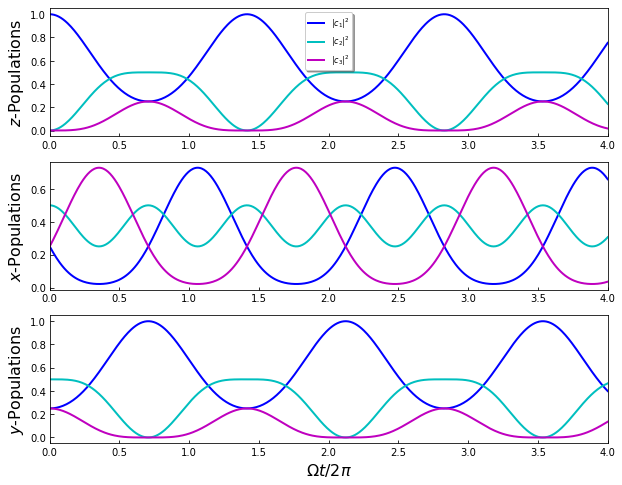

In [11]:
#----- Plot Reuslts -----
fig = plt.figure( figsize=(10,8) )
axb, axs, axc = fig.add_subplot(311), fig.add_subplot(312), fig.add_subplot(313)
fs = 16 #Label fontsize
labels = ['$|c_{1}|^2$', '$|c_{2}|^2$', '$|c_{3}|^2$'] #Plot labels

#--- Draw Plots ---
axb.plot( Psi.times*(Omega/2/np.pi), Psi.expect[0], 'b-', lw=2, label=labels[0] )
axb.plot( Psi.times*(Omega/2/np.pi), Psi.expect[1], 'c-', lw=2, label=labels[1] )
axb.plot( Psi.times*(Omega/2/np.pi), Psi.expect[2], 'm-', lw=2, label=labels[2] )

axs.plot( Psi.times*(Omega/2/np.pi), Psi.expect[3], 'b-', lw=2, label=labels[0] )
axs.plot( Psi.times*(Omega/2/np.pi), Psi.expect[4], 'c-', lw=2, label=labels[1] )
axs.plot( Psi.times*(Omega/2/np.pi), Psi.expect[5], 'm-', lw=2, label=labels[2] )

axc.plot( Psi.times*(Omega/2/np.pi), Psi.expect[6], 'b-', lw=2, label=labels[0] )
axc.plot( Psi.times*(Omega/2/np.pi), Psi.expect[7], 'c-', lw=2, label=labels[1] )
axc.plot( Psi.times*(Omega/2/np.pi), Psi.expect[8], 'm-', lw=2, label=labels[2] )

#--- Plot Settings ---
axb.set_ylabel('$z$-Populations', fontsize=fs)
axs.set_ylabel('$x$-Populations', fontsize=fs)
axc.set_ylabel('$y$-Populations', fontsize=fs)

axc.set_xlabel('$\Omega t/2\pi$', fontsize=fs) #Comman x-label
axb.legend(loc='best', fancybox=True, shadow=True, framealpha=1, fontsize=8)
for ax in axb, axs, axc:
    ax.set_xlim([0,periods]) #Remove extra spaces at ends
    ax.tick_params(direction='in') #Set grid-ticks inward
plt.show()

## Bloch Sphere: Majorana's Stellar Representation

Here we want to write a function that will take a given state and produce the corresponding Majorana stars (Bloch vectors) on the Bloch sphere; in the case of spin-1 there will be two such stars. THe method for finding such stars is summarized in [this paper](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.98.013627), and another source which is more complicated can be found [here](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.108.240402). Here we will follow the first source's method. Suppose we start with an arbitrary spin-1 state,

$$ |\psi\rangle = f_{-1}|-1\rangle + f_{0}|0\rangle + f_{+1}|+1\rangle, $$

with the $f_{\sigma}$ coefficients representing the complex amplitudes for each spin. One can use Schwinger boson theory to represent this state as a product state of two-mode bosons (I'm not sure how to do this though). In this representation states take the form,

$$ |\psi\rangle = \frac{1}{N} \prod_{j=1}^2 \left( \cos\frac{\theta_j}{2}a^{\dagger} + \sin\frac{\theta_j}{2}e^{i\phi_j}b^{\dagger} \right) |\emptyset\rangle. $$

The product series is comprised of a sum of the two boson creation operators with amplitude and phase angles $\theta_j$ and $\phi_j$ respectively. In this case, for each term in the product we can plot a Majorana star with coordinates $u_j=\left( \sin\theta_{j}\cos\phi_{j}, \sin\theta_{j}\sin\phi_{j}, \cos\theta_{j}\right)^{T}$. The goal then is to determine the angles $\theta_{j}, \phi_{j}$. We can construct a polynomial from the original state's coefficients as,

$$ h(z) = \sum_{j=0}^{2} \frac{(-1)^{j} f_{1-j}}{\sqrt{(2-j)!j!}} z^{2-j}, $$

and it can be shown (not by me) that the roots to this equation satisfy $z_{j}=\tan\frac{\theta_j}{2}e^{i\phi_j}$. So, by setting $h(z)=0$ and finding the roots, we can then determine the angles by the real and imaginary parts of $z_j$.

Our numerical implementation of this is reasonably straightforward, with a bit of a catch: if some of the state coefficients $f$ are 0, then the polynomial may be less than degree 2, therefore there will not always be 2 roots. This is strange, as we should be able to represent *any* state in this way, including spin-polarized states. It is also somewhat arbitrary since we've defined the polynomial such that the $f_{+1}$ coefficient sets the size of the $z^2$ term, but there is no reason why we couldn't construct the same thing with $f_{-1}$ since these states are only arbitrarily different (it's a choice of basis, so they are Gauge symmetric I think is how we'd say this). 

I don't have an obvious answer for this convention, but it presents a problem. We expect to sometimes have spin-polarized states in which case there may only be 1 root to the polynomial, or perhaps even none (we could have something like $0z^2 + 0z + 2 =0$). As such, my temprary and naive fix to this is to se manually set any coefficient $f$ which is precisely zero to the machine precision, 1e-5 instead. This way we won't break the root finder, and there will always be 2 roots; I'm not sure if this is correct, however.

Either way, once we find the roots we can then determine the angles by taking the real and imaginary parts of $z_j$ to construct a system of equations and use `scipy.optimize.fsolve` to extract the angles. This step is also finicky since the $\tan(x)$ function has asymptotes. Something worth trying is to unwrap the resulting angles to be $pi$-periodic like the $\tan(x)$ function, but we've had mixed sucess with this.

In [12]:
#----- Aditional Packages -----
from scipy.optimize import fsolve

def majorana_stars(state):
    ''' Compute Majorana Stars from Qobj() state '''
    
    #--- Compute Char. Polynomial ---
    dim = state.shape[0] #Length of the state
    F = (dim-1)/2 #F-quantum number
    s_as_array = np.array( state )[:,0] #Convert state coeffs to array
    
    coeffs = np.empty(dim, dtype=complex) #List of poly. coeffs
    for i, s in enumerate(np.flip(s_as_array)):
        coeffs[i] = (-1**i) * s / np.sqrt( np.math.factorial(2*F-i)*np.math.factorial(i) )
        if coeffs[i] == 0:
            coeffs[i] = 1e-5 #Set to eps instead to still have n roots
    
    #--- Compute Angles ---
    zj = np.roots( coeffs ) #Find roots
    
    def z_par(x, z):
        ''' Real & Imag parts to zj=tan(th/2)e^{i ph}'''
        re = np.tan(x[0]/2)*np.cos(x[1]) - np.real(z) #Real part
        im = np.tan(x[0]/2)*np.sin(x[1]) - np.imag(z) #Imaginary part
        return np.array([ re, im ])
    
    sol = []
    xs = [1,0]
    for root in zj:
        xs = fsolve( z_par, xs, args=root ) #Solve for the angles
        #sol.append([ 
            #xs[0]%np.pi, \
            #xs[1]%(2*np.pi) ]) #Modulo pi (theta), 2pi (phi)
        sol.append( [xs[0], xs[1]] )
    
    return np.array( sol )

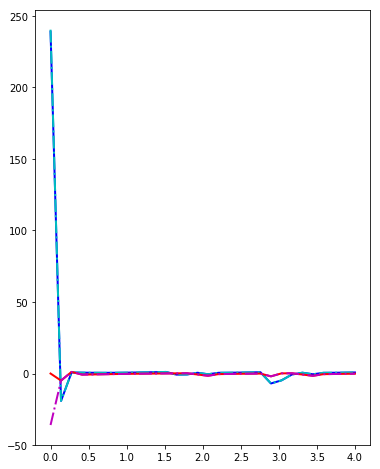

In [14]:
#----- Find States Explicitely -----
t = np.linspace(0, periods*(2*np.pi/Omega), num=30) #Time axis
Psi = qt.sesolve(Hrwa, psi, t) #Solve SE

angles = np.empty( (len(Psi.times),4) )
for i, state in enumerate(Psi.states):
    stars = majorana_stars( state )
    angles[i,:] = np.array([ stars[0][0], stars[0][1], stars[1][0], stars[1][1] ])

#angles = np.unwrap(angles, axis=0)

s1_t = np.array([ np.sin(angles[:,0])*np.cos(angles[:,1]), \
                 np.sin(angles[:,0])*np.sin(angles[:,1]), \
                 np.cos(angles[:,0]) ])
s2_t = np.array([ np.sin(angles[:,2])*np.cos(angles[:,3]), \
                 np.sin(angles[:,2])*np.sin(angles[:,3]), \
                 np.cos(angles[:,2]) ])

#--- Plot Angles ---
fig = plt.figure( figsize=(6,8) )
plt.plot( Psi.times*(Omega/2/np.pi), angles[:,0]/np.pi, 'b-', lw=2 )
plt.plot( Psi.times*(Omega/2/np.pi), angles[:,2]/np.pi, 'c-.', lw=2 )
plt.plot( Psi.times*(Omega/2/np.pi), angles[:,1]/np.pi, 'r-', lw=2 )
plt.plot( Psi.times*(Omega/2/np.pi), angles[:,3]/np.pi, 'm-.', lw=2 )
plt.show()

In [16]:
#----- Animation -----
#--- Remove Old Animation ---
import os

for ext in '.gif', '.mp4':
    try:
        os.remove( 'Three-Level_MSR' + ext )
    except OSError:
        pass #If the file doesn't exist it won't crash

#--- Begin New Plot ---
fig = plt.figure()
b = qt.Bloch() #Bloch sphere class

#--- Settings ---
b.view = [-40,30] #Viewing angle
b.vector_color = ['b', 'r']
b.point_color = ['b', 'r']
b.point_marker = ['s', 'o']
points = 20 #Number of points to show
point_sizes = [2*i for i in range(1,points+1)] #Change point size small -> big

#--- Draw Figure ---
b.add_vectors([s1_t[:,0], s2_t[:,0]]) #Initial state
files = [] #List of created image files

for i,vecs in enumerate(s1_t[0,:]):
    b.clear() #Clear previous drawings
    #b.vector_color = 'b'
    b.add_vectors( [s1_t[:,i], s2_t[:,i]] )
    b.add_points( s1_t[:,i] )
    b.add_points( s2_t[:,i] )
    #b.vector_color = 'r'
    
    #if i<points:
        #b.point_size = point_sizes[:i+1] #Increase point size with each new point
        #b.add_states(states[:i], 'point')
    #else:
        #b.add_states(states[i-points:i], 'point') #Only plot last few points
        
    b.save(name=f'tmp/MSR_{i}') #saving images to tmp directory in current working directory
    files.append( f'tmp/MSR_{i}.png' ) #Add new image to list

#--- Compile Images into .mp4 ---
import subprocess #For calling ffmpeg

#.mp4 then .gif
#subprocess.call(['ffmpeg', '-r', '10', '-i', 'tmp/bloch_%01d.png', '-vf', 'format=yuv420p', 'Three-Level_MSR.mp4'])
subprocess.call(['ffmpeg', '-r', '10', '-i', 'tmp/MSR_%01d.png', 'Three-Level_MSR.gif'])

#--- Remove Raw Images ---
for file in files:
    try:
        os.remove( file ) #Delete images
    except OSError:
        pass #If the file doesn't exist it won't crash

<Figure size 432x288 with 0 Axes>